In [1]:
from src_trainer.TOTALVI_model import TOTALVI
import anndata as ad
import numpy as np
from scipy.sparse import csc_matrix
import pandas as pd

Global seed set to 0


## Import model

In [2]:
my_model = TOTALVI.load("../input/{}_{}".format('TOTALVI', '20220518-222446'))
print(my_model._model_summary_string())

INFO     Computing empirical prior initialization for protein background.                    
Initalised own init
INFO     Computing empirical prior initialization for protein background.                    


INFO:scvi.model._totalvi:Computing empirical prior initialization for protein background.
INFO:scvi.model._totalvi:Computing empirical prior initialization for protein background.


## Loss evaluation

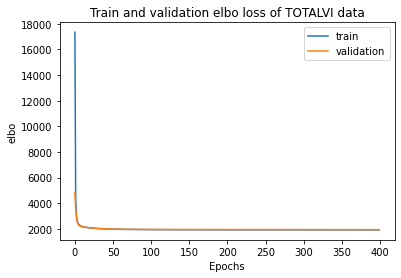

Minimal elbo train value: elbo_train    1912.963501
Name: 399, dtype: object and val value: elbo_validation    1934.654419
Name: 399, dtype: object
Minimal reconstruction_loss train value: reconstruction_loss_train    1890.380615
Name: 399, dtype: object and val value: reconstruction_loss_validation    1914.014282
Name: 399, dtype: object
Minimal kl_local train value: kl_local_train    22.582714
Name: 399, dtype: object and val value: kl_local_validation    20.640295
Name: 399, dtype: object


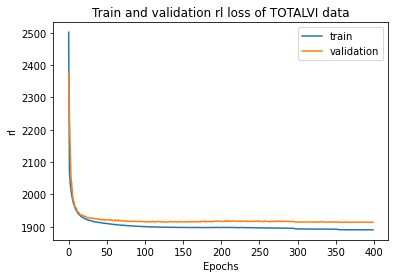

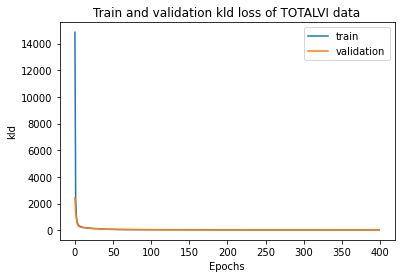

In [10]:
from src_trainer.plotting import plot_single_value, plot_train_val

args_elbo = {'var': "elbo",
             'var_label': "elbo",
             'ylim': None,
             'modality': my_model.args['model_type']
             }
args_rl = {'var': "reconstruction_loss",
           'var_label': "rl",
           'ylim': None,
           'modality': my_model.args['model_type']
           }
args_kld = {'var': "kl_local",
            'var_label': "kld",
            'ylim': None,
            'modality': my_model.args['model_type']
            }

list_args = [args_elbo, args_rl, args_kld]

for plot_args in list_args:
    if my_model.args['check_val_every_n_epoch'] is not None:
        plot_train_val(my_model, plot_args=plot_args, pdf=None)
    else:
        plot_single_value(my_model, plot_args, 'train')
    print("Minimal {} train value: {} and val value: {}".format(
        plot_args['var'], 
        my_model.history['{}_train'.format(plot_args['var'])].iloc[-1],
        my_model.history['{}_validation'.format(plot_args['var'])].iloc[-1],
    ))

# Evaluation reconstructions



In [3]:
from src_trainer.plotting import get_cat_covs, figure_caption, plot_reconstruction, compare_hvg, evaluate_corr

cond_dict = {'group': 'LD',
             'annotation_L1': None,
             'condition': 'PI'}

marker_dict = {'CD4T': [['CD3D', 'CD4'], ['CD3_ADT', 'CD4_ADT']],
                'B': [['MS4A1', 'CD19', 'CD79A'], ['CD19_ADT', 'CD20_ADT']],
                'Monocyte': [['S100A9', 'CD14'], ['CD14_ADT', 'CD16_ADT']]}

all_markers = my_model.adata.var_names
data = my_model.adata.copy()

## Spearman correlations

Posterior sampling

In [ ]:
evaluate_corr(my_model, sample_dist = "posterior", plot_corr=True, eval_hvg=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/anndata/_io/h5ad.py:238: OldFormatWarning: Element '/layers' was written without encoding metadata.
  d[k] = read_elem(f[k])
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/anndata/_io/specs/methods.py:92: OldFormatWarning: Element '/layers/normcounts' was written without encoding metadata.
  return {k: read_elem(v) for k, v in elem.items()}
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/anndata/_io/specs/methods.py:584: OldFormatWarning: Element '/obs/__categories/sample_id' was written without encoding metadata.
  categories = read_elem(categories_dset)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/anndata/_io/specs/methods.py:587: OldFormatWarning: Element '/obs/sample_id' was written without encoding metadata.
  read_elem(dataset), categories, ordered=ordered
/Library/Frameworks/Python.framework/Versions/3.9/lib/p

Prior sampling

In [4]:
evaluate_corr(my_model, sample_dist = "prior", plot_corr=False, eval_hvg=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/anndata/_io/h5ad.py:238: OldFormatWarning: Element '/layers' was written without encoding metadata.
  d[k] = read_elem(f[k])
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/anndata/_io/specs/methods.py:92: OldFormatWarning: Element '/layers/normcounts' was written without encoding metadata.
  return {k: read_elem(v) for k, v in elem.items()}
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/anndata/_io/specs/methods.py:584: OldFormatWarning: Element '/obs/__categories/sample_id' was written without encoding metadata.
  categories = read_elem(categories_dset)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/anndata/_io/specs/methods.py:587: OldFormatWarning: Element '/obs/sample_id' was written without encoding metadata.
  read_elem(dataset), categories, ordered=ordered
/Library/Frameworks/Python.framework/Versions/3.9/lib/p

   Population group Cell type Adjuvant  corr_mean  corr_mean_DE  corr_var  \
0                DK         B       PI      0.487         0.565     0.484   
1                DK         B   medium      0.486         0.504     0.483   
2                DK      CD4T       PI      0.678         0.719     0.673   
3                DK      CD4T   medium      0.699         0.681     0.691   
4                DK      CD8T       PI      0.647         0.687     0.641   
5                DK      CD8T   medium      0.661         0.634     0.655   
6                DK        DC       PI      0.306         0.427     0.296   
7                DK        DC   medium      0.366         0.431     0.359   
8                DK  Monocyte       PI      0.506         0.599     0.499   
9                DK  Monocyte   medium      0.646         0.693     0.638   
10               DK        NK       PI      0.463         0.526     0.462   
11               DK        NK   medium      0.538         0.544     0.533   

ValueError: b'There are other near singularities as well. 0.72135\n'

Transfer sampling

In [5]:
evaluate_corr(my_model, sample_dist = "transfer", plot_corr=False)

Transfer sampling


KeyError: 'px_r'

## Transfer predictive sampling  

Predict *perturbed* condition with encoder input *medium*

In [14]:
adata = ad.read(my_model.args["dataset_path"])

for cell_type, markers_list in marker_dict.items():
    cond_dict['annotation_L1'] = cell_type
    cond_dict['condition'] = 'PI'
    _, indices = get_cat_covs(my_model, cond_dict)
    cond_dict['condition'] = 'medium'
    cat_covs, _ = get_cat_covs(my_model, cond_dict)
    recon = my_model.transfer_predictive_sample(adata=my_model.adata,
                                                indices=indices,
                                                cat_covs=cat_covs)
    recon_adata = ad.AnnData(csc_matrix(pd.DataFrame(recon, columns=all_markers)))
    recon_adata.var_names = all_markers
    
    for marker in markers_list[0]:
        gene_mask = np.where([True if gene in marker else False for gene in all_markers])[0].tolist()
        if not np.any(gene_mask):
            print("Gene marker {} not in data".format(marker))
            continue
        txt = figure_caption('RNA', marker, cell_type, cond_dict['group'], cond_dict['condition'])
        plot_reconstruction(data, recon_adata, gene_mask, txt, all_markers, indices, pdf=None, i=0)
        
    # calculate correlation
    # corr = get_feature_correlation_matrix(adata=adata[indices_org], pred_x=recon, plot_corr=True, cell_type=cell_type, pdf=pdf)
    # print("The correlation values are: {}".format(corr))
    
    # compare hvg
    common_hvg = compare_hvg(recon_adata=recon_adata, org_adata=my_model.adata, n_top_genes=1000)

    

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/anndata/_io/h5ad.py:238: OldFormatWarning: Element '/layers' was written without encoding metadata.
  d[k] = read_elem(f[k])
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/anndata/_io/specs/methods.py:92: OldFormatWarning: Element '/layers/normcounts' was written without encoding metadata.
  return {k: read_elem(v) for k, v in elem.items()}
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/anndata/_io/specs/methods.py:584: OldFormatWarning: Element '/obs/__categories/sample_id' was written without encoding metadata.
  categories = read_elem(categories_dset)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/anndata/_io/specs/methods.py:587: OldFormatWarning: Element '/obs/sample_id' was written without encoding metadata.
  read_elem(dataset), categories, ordered=ordered
/Library/Frameworks/Python.framework/Versions/3.9/lib/p

NotImplementedError: There were no tensor arguments to this function (e.g., you passed an empty list of Tensors), but no fallback function is registered for schema aten::_cat.  This usually means that this function requires a non-empty list of Tensors, or that you (the operator writer) forgot to register a fallback function.  Available functions are [CPU, QuantizedCPU, BackendSelect, Named, ADInplaceOrView, AutogradOther, AutogradCPU, AutogradCUDA, AutogradXLA, UNKNOWN_TENSOR_TYPE_ID, AutogradMLC, AutogradHPU, AutogradNestedTensor, AutogradPrivateUse1, AutogradPrivateUse2, AutogradPrivateUse3, Tracer, Autocast, Batched, VmapMode].

CPU: registered at aten/src/ATen/RegisterCPU.cpp:16286 [kernel]
QuantizedCPU: registered at aten/src/ATen/RegisterQuantizedCPU.cpp:1025 [kernel]
BackendSelect: fallthrough registered at ../aten/src/ATen/core/BackendSelectFallbackKernel.cpp:3 [backend fallback]
Named: registered at ../aten/src/ATen/core/NamedRegistrations.cpp:7 [backend fallback]
ADInplaceOrView: fallthrough registered at ../aten/src/ATen/core/VariableFallbackKernel.cpp:60 [backend fallback]
AutogradOther: registered at ../torch/csrc/autograd/generated/VariableType_2.cpp:9928 [autograd kernel]
AutogradCPU: registered at ../torch/csrc/autograd/generated/VariableType_2.cpp:9928 [autograd kernel]
AutogradCUDA: registered at ../torch/csrc/autograd/generated/VariableType_2.cpp:9928 [autograd kernel]
AutogradXLA: registered at ../torch/csrc/autograd/generated/VariableType_2.cpp:9928 [autograd kernel]
UNKNOWN_TENSOR_TYPE_ID: registered at ../torch/csrc/autograd/generated/VariableType_2.cpp:9928 [autograd kernel]
AutogradMLC: registered at ../torch/csrc/autograd/generated/VariableType_2.cpp:9928 [autograd kernel]
AutogradHPU: registered at ../torch/csrc/autograd/generated/VariableType_2.cpp:9928 [autograd kernel]
AutogradNestedTensor: registered at ../torch/csrc/autograd/generated/VariableType_2.cpp:9928 [autograd kernel]
AutogradPrivateUse1: registered at ../torch/csrc/autograd/generated/VariableType_2.cpp:9928 [autograd kernel]
AutogradPrivateUse2: registered at ../torch/csrc/autograd/generated/VariableType_2.cpp:9928 [autograd kernel]
AutogradPrivateUse3: registered at ../torch/csrc/autograd/generated/VariableType_2.cpp:9928 [autograd kernel]
Tracer: registered at ../torch/csrc/autograd/generated/TraceType_2.cpp:9621 [kernel]
Autocast: registered at ../aten/src/ATen/autocast_mode.cpp:259 [kernel]
Batched: registered at ../aten/src/ATen/BatchingRegistrations.cpp:1019 [backend fallback]
VmapMode: fallthrough registered at ../aten/src/ATen/VmapModeRegistrations.cpp:33 [backend fallback]


## Prior predictive sampling (scenario 2)

Predict perturbed condition from left out population (LD) given samples from the Gaussian prior distribution.

In [ ]:
for cell_type, markers_list in marker_dict.items():
    cond_dict['annotation_L1'] = cell_type
    cat_covs, indices = get_cat_covs(my_model, cond_dict)
    n_sample = my_model.adata[indices].n_obs
    recon = my_model.prior_predictive_sample(cat_covs=cat_covs,
                                              n_samples=n_sample,)
    recon_adata = ad.AnnData(csc_matrix(pd.DataFrame(recon, columns=all_markers)))
    recon_adata.var_names = all_markers

    # calculate correlation
    #corr = get_feature_correlation_matrix(adata=data[indices], pred_x=recon, plot_corr=True, cell_type=cell_type, pdf=pdf)

    # compare hvg
    #common_hvg = compare_hvg(recon_adata=recon_adata, org_adata=data, n_top_genes=n_top_hvg)
    
    for marker in markers_list[0]:
        gene_mask = np.where([True if gene in marker else False for gene in all_markers])[0].tolist()
        if not np.any(gene_mask):
            print("Gene marker {} not in data".format(marker))
            continue
        txt = figure_caption('RNA', marker, cell_type, cond_dict['group'], cond_dict['condition'])
        plot_reconstruction(data, recon_adata, gene_mask, txt, all_markers, indices, pdf=None, i=0)